In [274]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### I am working with tennis_stats.csv to practice Linear and Multiple Regressio in Python
This data set contains a number of stats on 1500 ATP players between 2009 and 2017.
My goals for this exercise are 

- try and find variables that could be used to predict certain outcomes (e.g. Winnings or Rankings)
- determine wether the models are good enough based on the model score

In [290]:
# load and investigate the data:
tennis = pd.read_csv("tennis_stats.csv")
tennis.head(3)

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119


In [10]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [322]:
#Just for fun, I am curious to know who the most successful player in this dataset is
#Total winnings by each player
player_career_wins = tennis.groupby("Player").Wins.sum().reset_index()
player_career_wins.sort_values("Wins",ascending=False, inplace=True, ignore_index=True)

player_career_wins

,Player,Wins
0,Philipp Kohlschreiber,246
1,Sam Querrey,232
2,Andreas Seppi,229
3,Marcos Baghdatis,221
4,Ivan Dodig,216
...,...,...
433,Edward Corrie,0
434,Patrick Kypson,0
435,Eduardo Struvay,0
436,Pedja Krstin,0


# Exploratory Data Analysis
## Trying to find variables with strong correlation

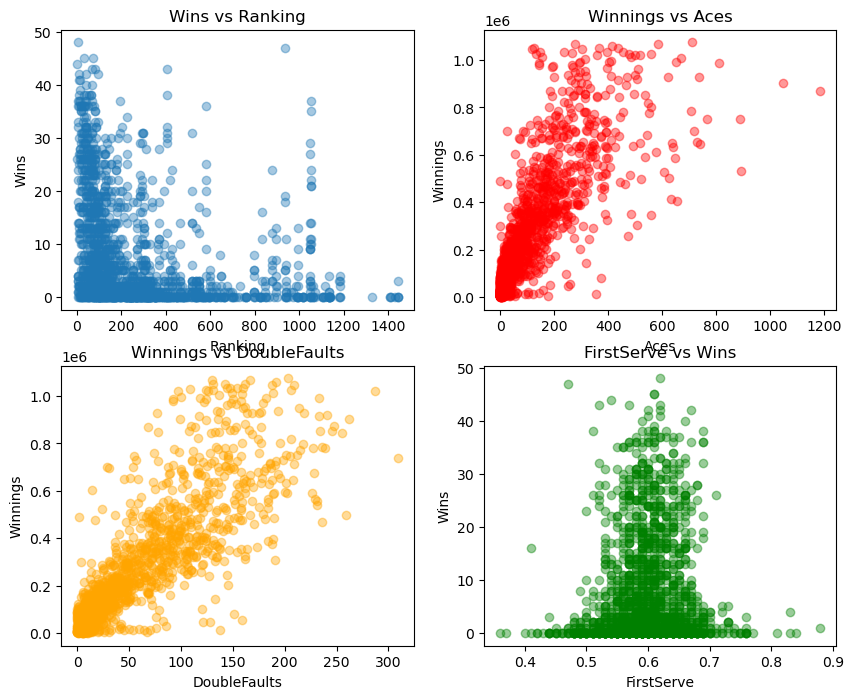

In [268]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
plt.scatter(tennis.Ranking,tennis.Wins,alpha=0.4)
plt.title("Wins vs Ranking")
plt.xlabel("Ranking")
plt.ylabel("Wins")

plt.subplot(2,2,2)
plt.scatter(tennis.Aces, tennis.Winnings, alpha=0.4, color="red")
plt.title("Winnings vs Aces")
plt.xlabel("Aces")
plt.ylabel("Winnings")

plt.subplot(2,2,3)
plt.scatter(tennis.DoubleFaults, tennis.Winnings, alpha=0.4, color="orange")
plt.title("Winnings vs DoubleFaults")
plt.xlabel("DoubleFaults")
plt.ylabel("Winnings")


plt.subplot(2,2,4)
plt.scatter(tennis.FirstServe, tennis.Wins, alpha=0.4, color="green")
plt.title("FirstServe vs Wins")
plt.xlabel("FirstServe")
plt.ylabel("Wins")

plt.show()

# Linear Regression with 1 feature
### I believe "Aces" could be a good predictor of "Winnings"

In [44]:
# Regression x = Aces , y = Winnings

X = tennis.Aces
X = X.values.reshape(-1,1)

y = tennis.Winnings
y = y.values.reshape(-1,1)

In [64]:
# split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [190]:
# create and train model on training data
lm = LinearRegression()
lm.fit(x_train,y_train)

print(lm.coef_, lm.intercept_)
print('Predicting Winnings with one Feature Test Score:', lm.score(x_train, y_train))

y_predict = lm.predict(X)

[[1431.25350402]] [95816.97540653]
Predicting Winnings with one Feature Test Score: 0.6194543643958027


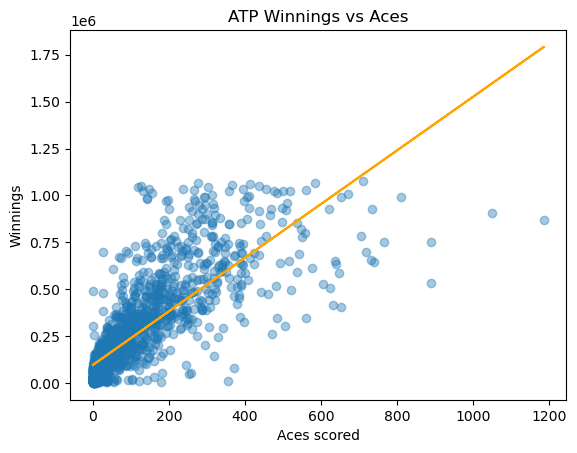

In [74]:
# plot the data
plt.scatter(X,y,alpha=0.4)
plt.plot(X,y_predict,color="orange")
plt.title("ATP Winnings vs Aces")
plt.xlabel("Aces scored")
plt.ylabel("Winnings")
plt.show()

In [80]:
lm.score(X,y)

0.6371212271758089

# Linear Regression with 2 features
## Predicting "Winnings" by "BreakPointsOpportunities" and "FirstServeReturnPointsWon"

In [174]:
features = tennis[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
winnings = tennis[['Winnings']]

In [176]:
# split data into train and test sets
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

In [194]:
# create and train model on training data
mlr = LinearRegression()
mlr.fit(features_train, winnings_train)

print("Coefficient(s):", mlr.coef_, "Intercept:", mlr.intercept_)
print('Predicting Winnings with two Features Test Score:', mlr.score(features_train, winnings_train))

winnings_predict = mlr.predict(features_test)

Coefficient(s): [[   1874.6550762  -202611.50750144]] Intercept: [93137.79896614]
Predicting Winnings with two Features Test Score: 0.8206999266666809


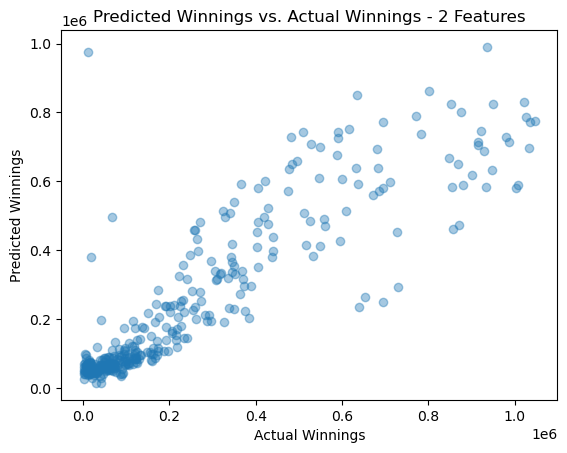

<Figure size 640x480 with 0 Axes>

In [180]:
plt.scatter(winnings_test,winnings_predict, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

# Linear Regression with multiple features

In [170]:
# select features and value to predict
features_mlr = tennis[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings_mlr = tennis[['Winnings']]

# train, test, split the data
features_train_mlr, features_test_mlr, winnings_train_mlr, winnings_test_mlr = train_test_split(features_mlr, winnings_mlr, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train_mlr,winnings_train_mlr)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test_mlr,winnings_test_mlr))

# make predictions with model
winnings_predict_mlr = model.predict(features_test_mlr)


Predicting Winnings with Multiple Features Test Score: 0.829745376079672


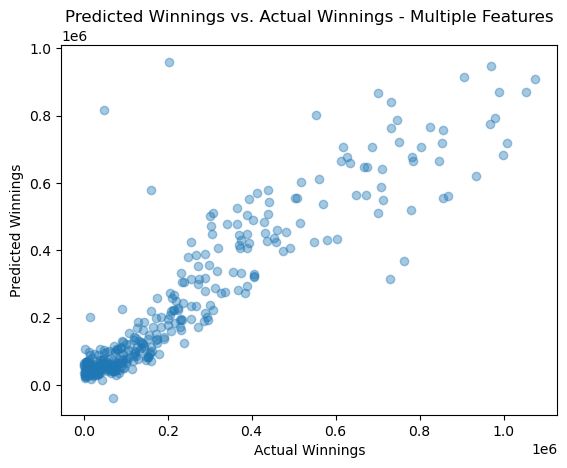

In [202]:
# plot predictions against actual winnings
plt.scatter(winnings_test_mlr,winnings_predict_mlr, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()